In [ ]:
!pip install lightgbm

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Diabetes prediction/diabetes.csv')
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

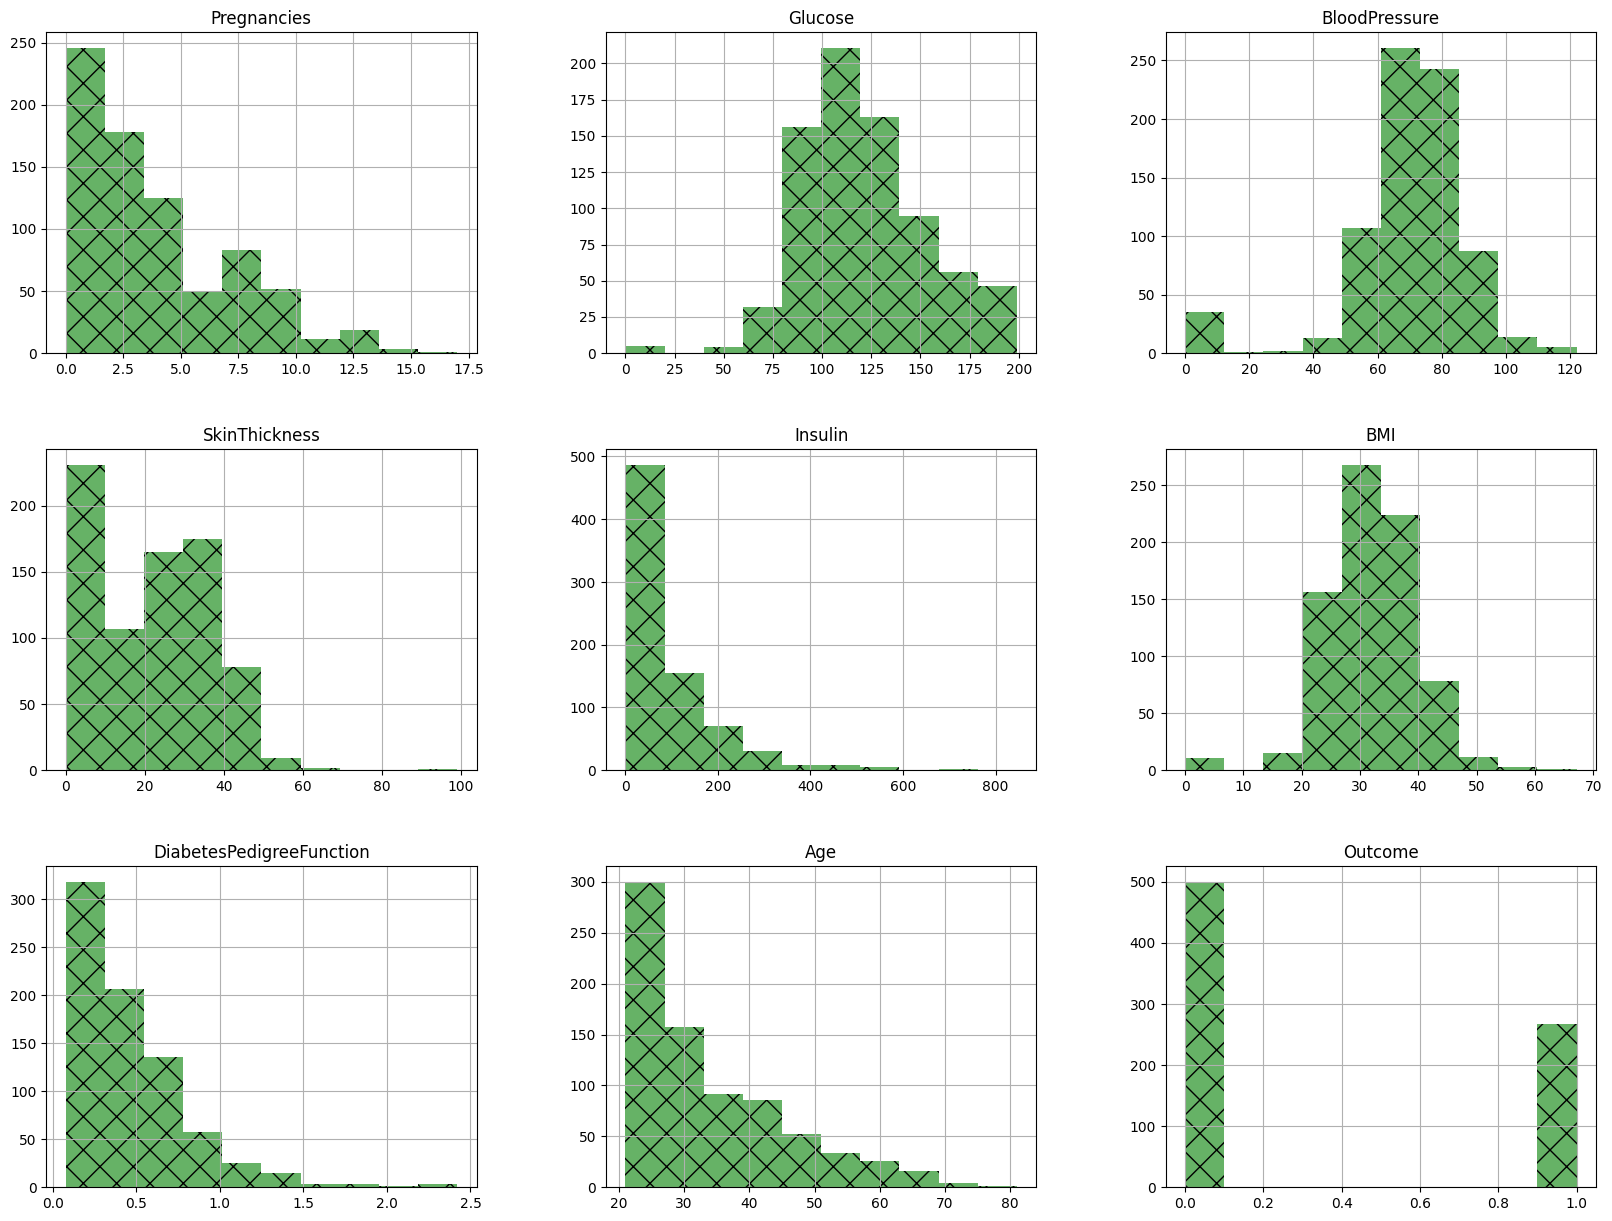

In [6]:
#analysing each colomn of the data so that outliers can be detected
w = 5
df.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X', rwidth=w);

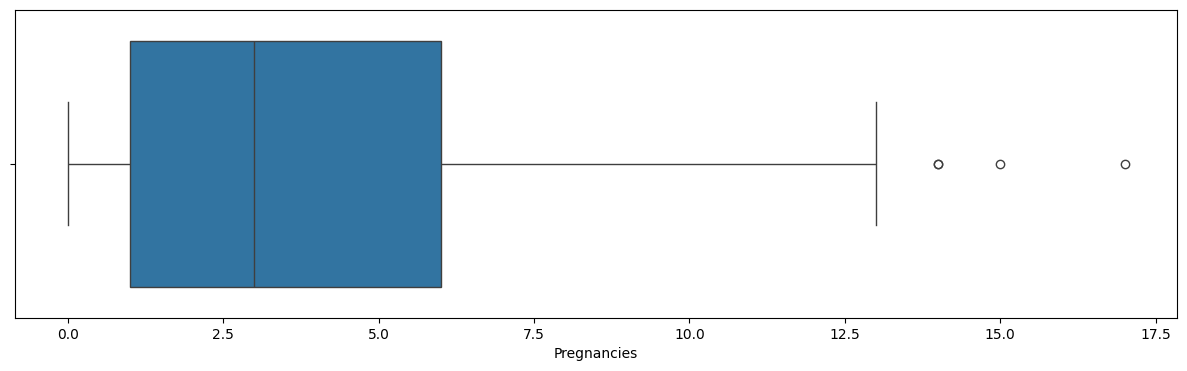

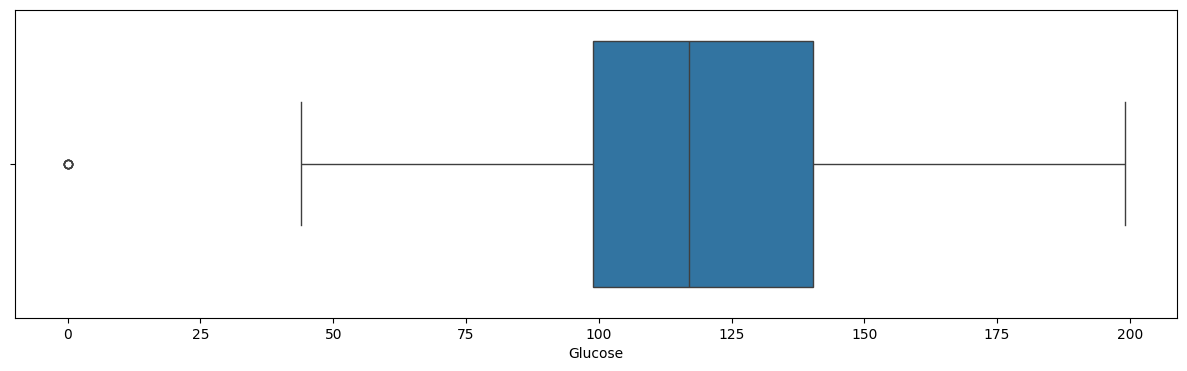

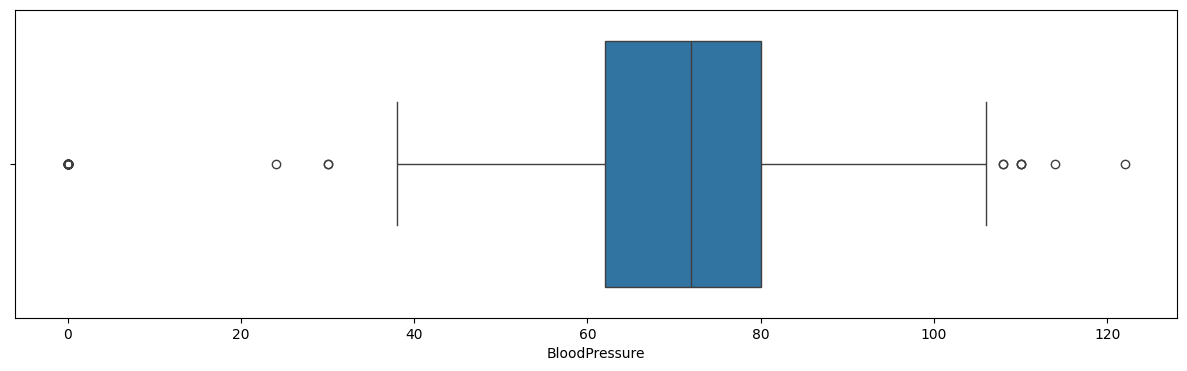

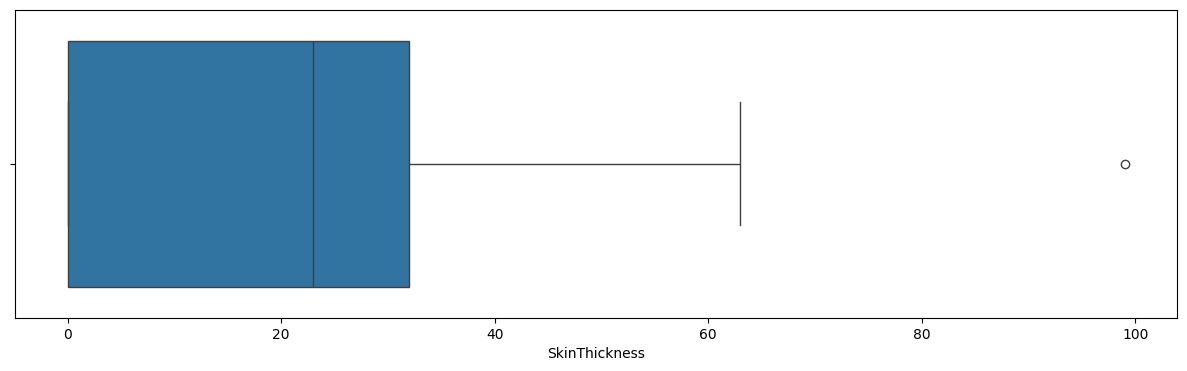

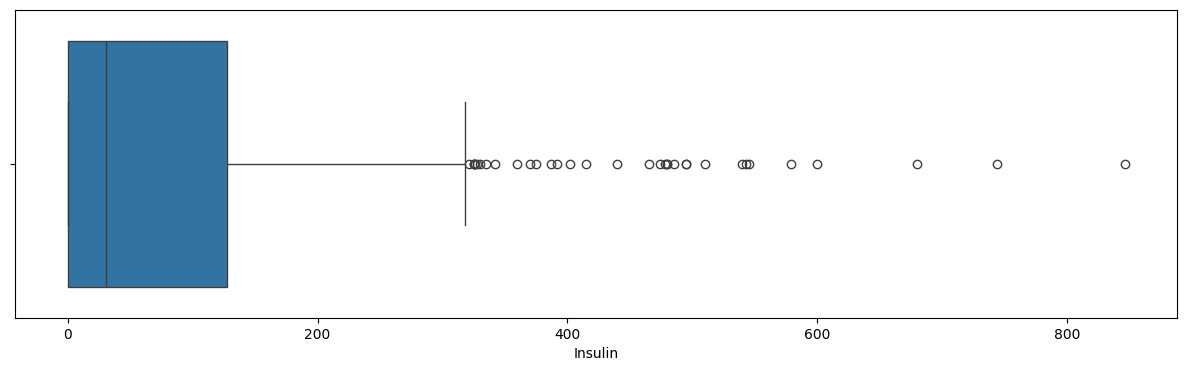

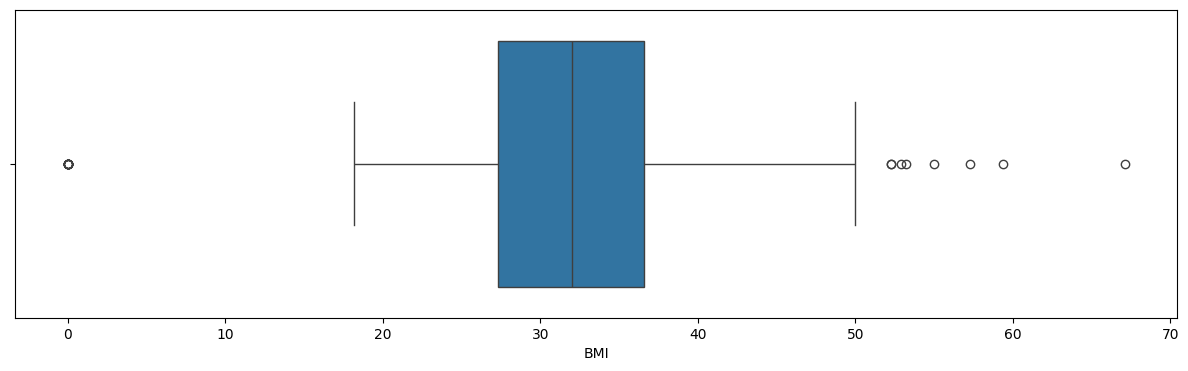

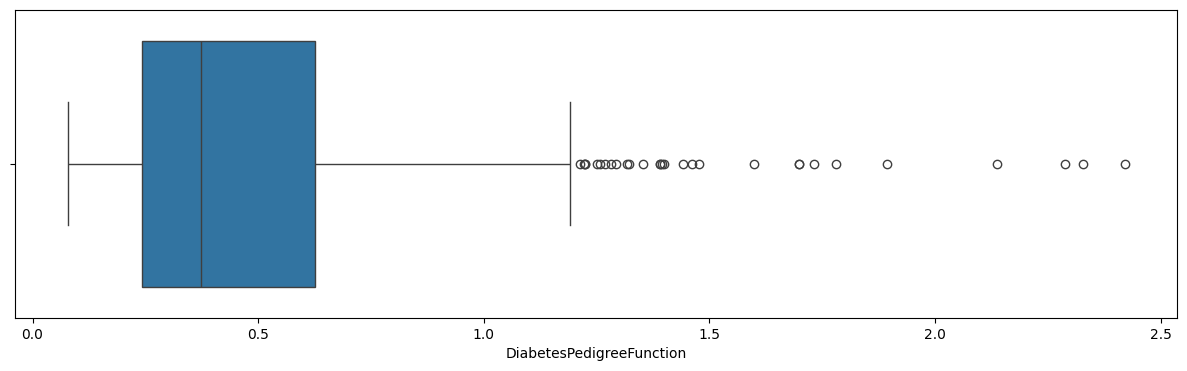

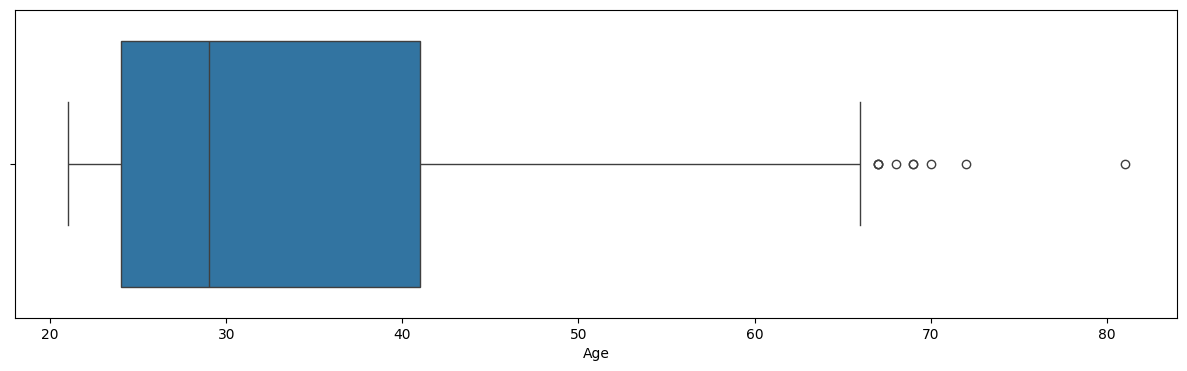

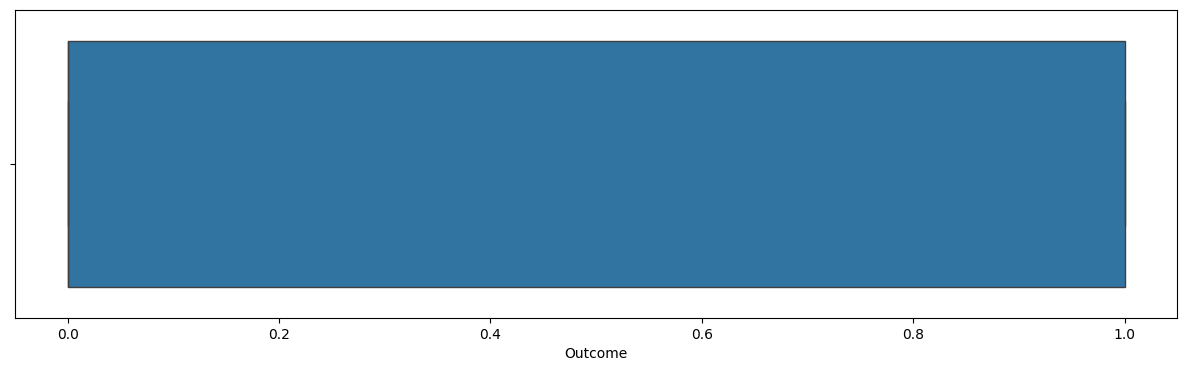

In [9]:
#Scatterplots of all the columns so that data can be visualised to detect the presence of outlier
for column in df:
        plt.figure(figsize=(15,4))
        sns.boxplot(data=df, x=column)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


this code calculates the lower and upper limits for the " " column based on mean and standard deviation, then filters the DataFrame df to retain only those rows where the " " values fall within this range. Finally, it replaces the original DataFrame with the filtered one. This process effectively removes outliers from the " " column of the DataFrame.

In [11]:
#outlier treatment by using
lower_limit = df["Insulin"].mean() - 3*df["Insulin"].std()
upper_limit = df["Insulin"].mean() + 3*df["Insulin"].std()
df_new = df[(df["Insulin"] > lower_limit) & (df["Insulin"] < upper_limit)]
df=df_new

llower_limit = df["SkinThickness"].mean() - 3*df["SkinThickness"].std()
uupper_limit = df["SkinThickness"].mean() + 3*df["SkinThickness"].std()
df_n = df[(df["SkinThickness"] > llower_limit) & (df["SkinThickness"] < uupper_limit)]
df=df_n

blower_limit = df["DiabetesPedigreeFunction"].mean() - 3*df["DiabetesPedigreeFunction"].std()
aupper_limit = df["DiabetesPedigreeFunction"].mean() + 3*df["DiabetesPedigreeFunction"].std()
df_nas = df[(df["DiabetesPedigreeFunction"] > blower_limit) & (df["DiabetesPedigreeFunction"] < aupper_limit)]
df=df_nas

ablower_limit = df["BloodPressure"].mean() - 3*df["BloodPressure"].std()
abupper_limit = df["BloodPressure"].mean() + 3*df["BloodPressure"].std()
df_c = df[(df["BloodPressure"] > ablower_limit) & (df["BloodPressure"] < abupper_limit)]
df=df_c

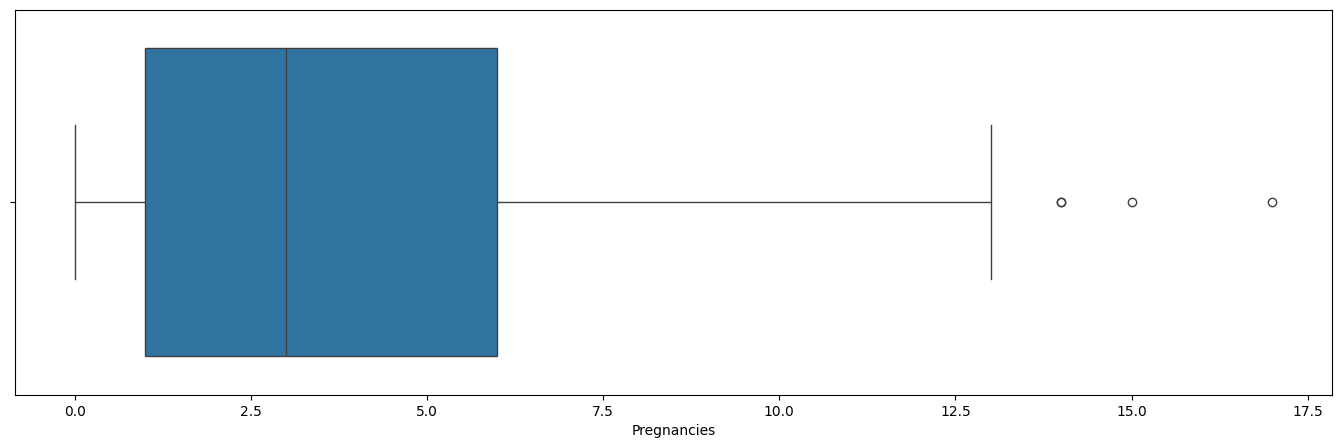

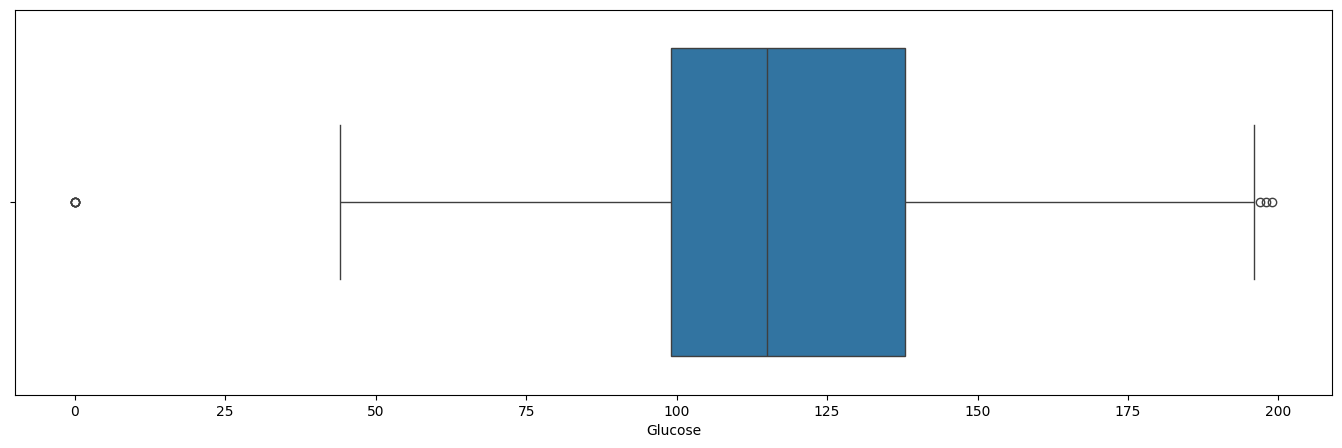

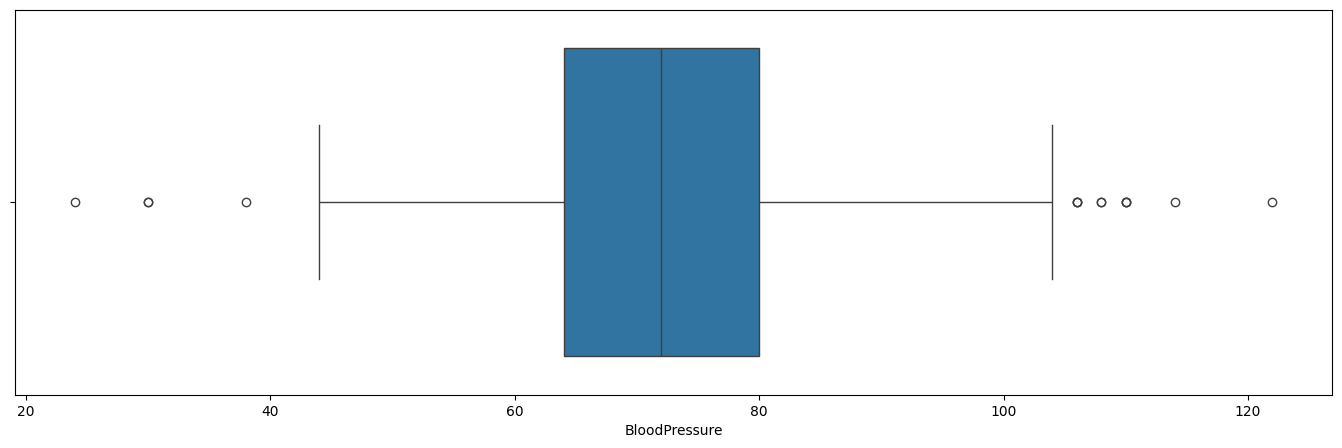

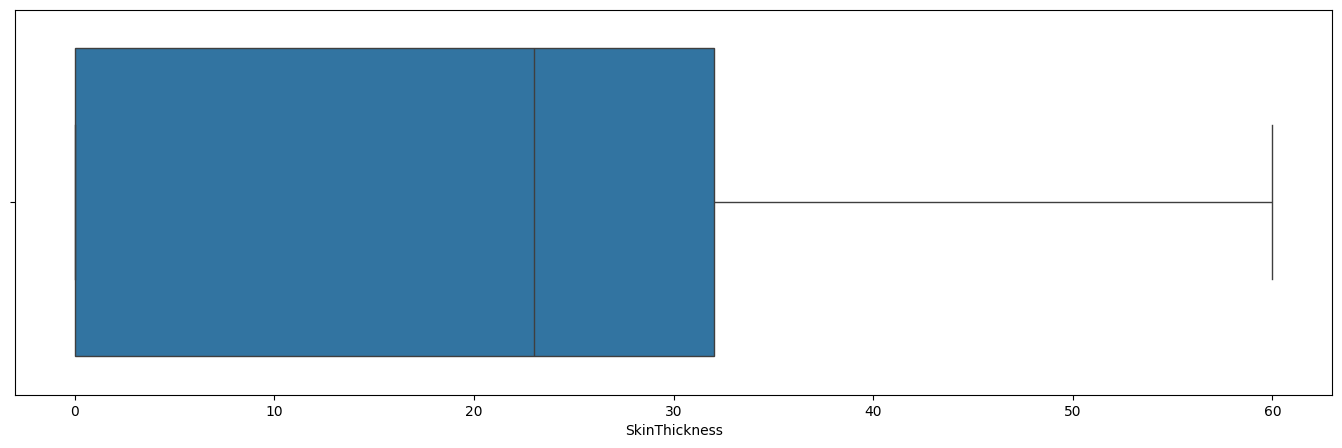

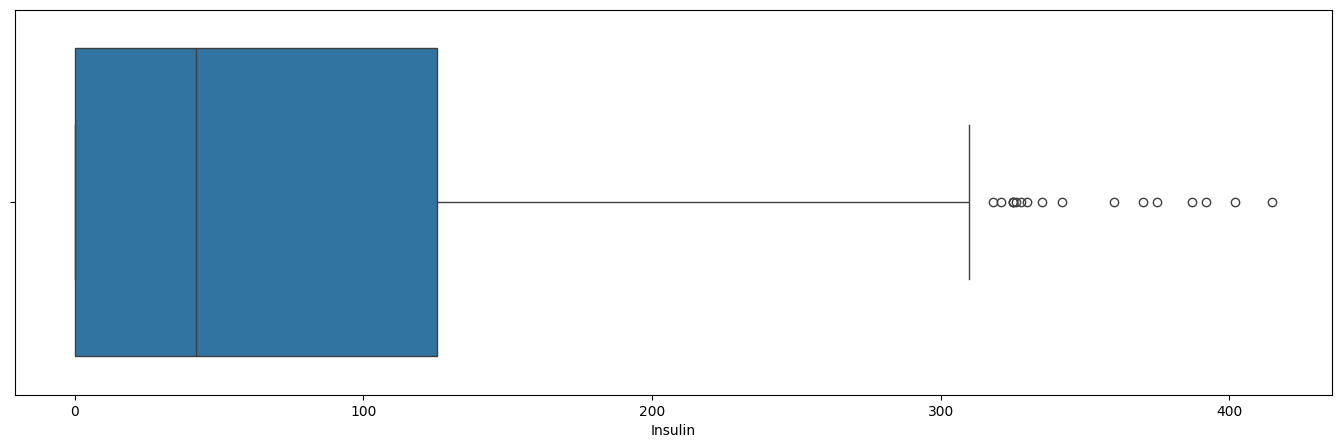

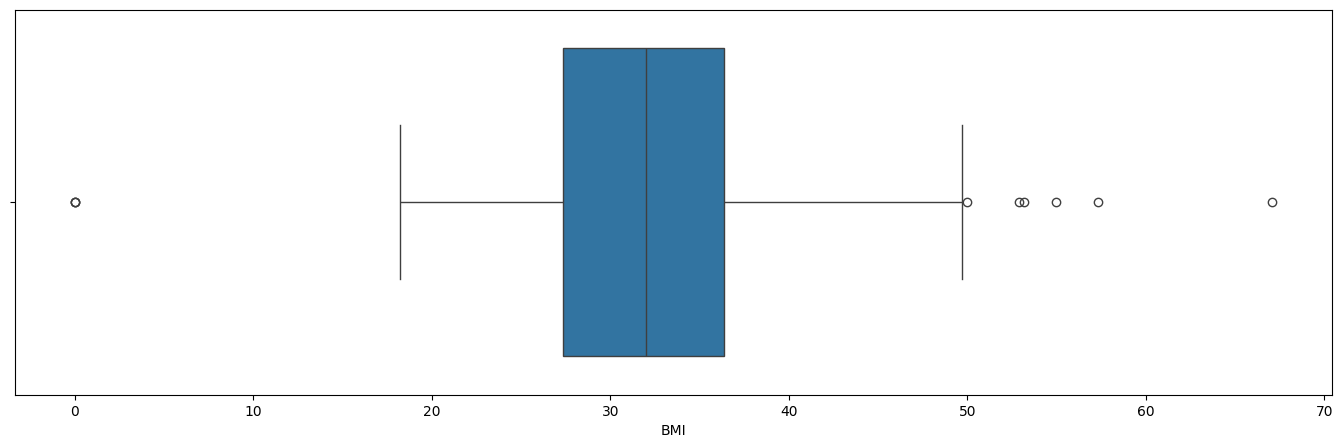

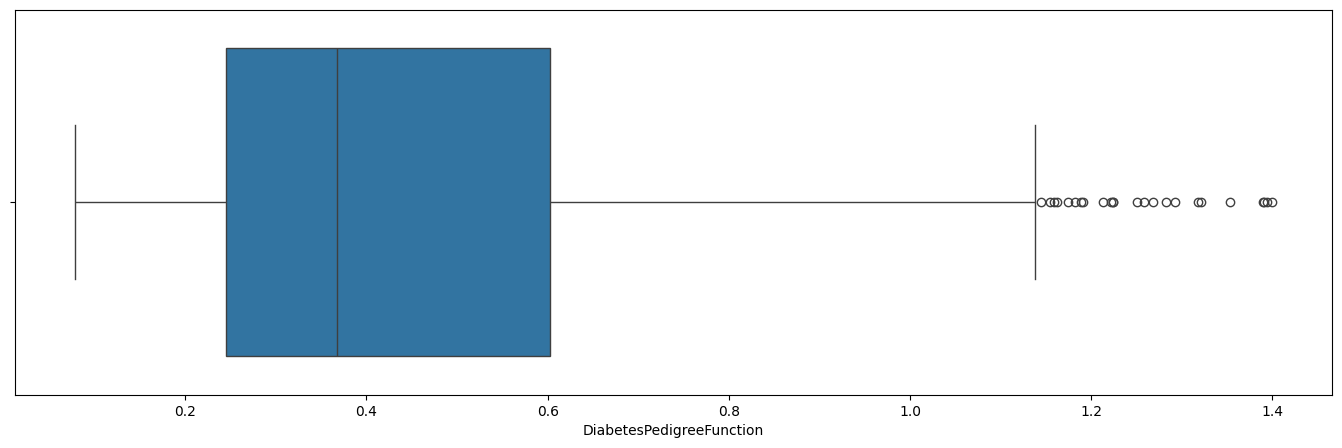

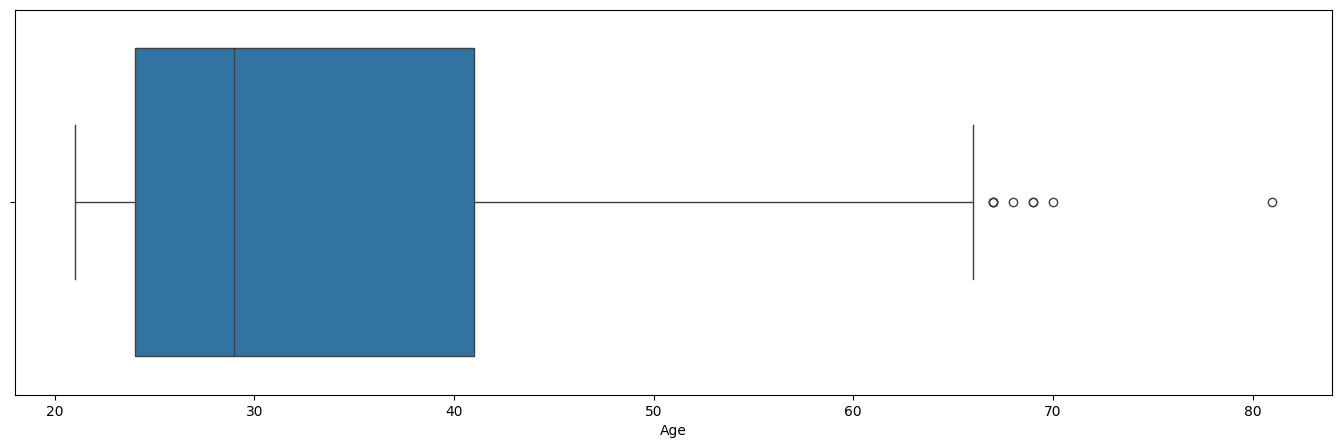

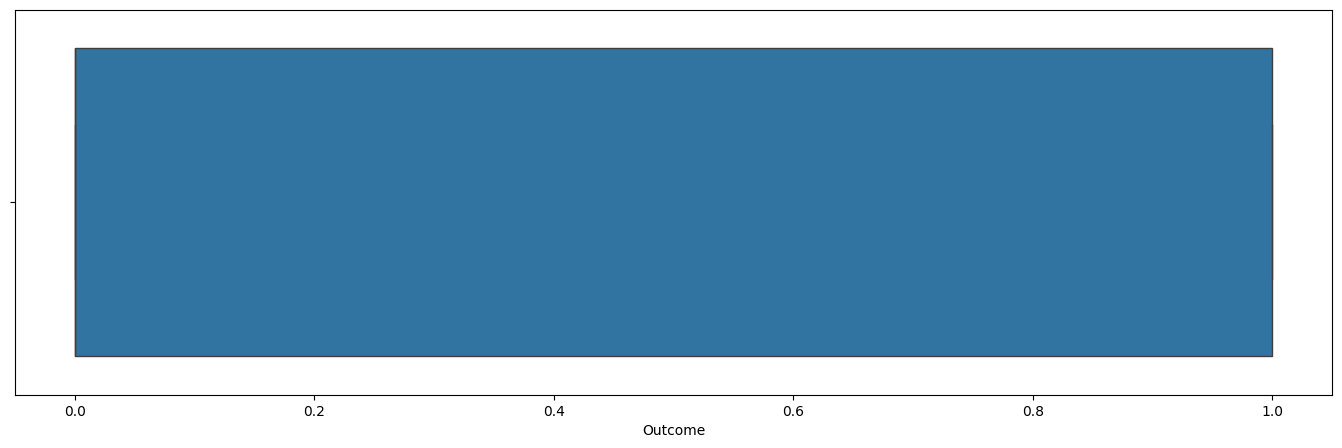

In [12]:
#Scatterplots to verify all the outliers has been removed or not
for column in df:
        plt.figure(figsize=(17,5))
        sns.boxplot(data=df, x=column)

In [13]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [14]:
#scaling using Robustscaler to normalize the data
scaler = RobustScaler()
scaler.fit(x)
imputed_x_= scaler.transform(x)
#X_test_scaled = scaler.transform(imputed_x_test)
RobustScaler()

RobustScaler()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
param_grid= {'kernel': ('linear', 'rbf'),'C': [1, 10, 100]}
base_estimator = svm.SVC(gamma='scale')
clf= HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, max_resources=40,
                         aggressive_elimination=False).fit(x_train,y_train)

In [18]:
x_train_prediction_svm=clf.predict(x_train)

In [19]:
#checking the accuracy score using LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

In [20]:
#using knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [21]:
#checking the accuracy score using Decisiontree
from sklearn import tree
dst = tree.DecisionTreeClassifier(criterion="entropy")
dst = dst.fit(x_train,y_train)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rf=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [23]:
classifier_rf = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv= 5)
classifier_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
classifier_rf.best_params_

In [27]:
classifier_rf=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='gini')
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=500,
                       random_state=42)

In [31]:
model = lgb.LGBMClassifier(n_iter=200,random_state=442,
                           silent=True, metric='None', n_jobs=4,force_col_wise=True,
                           max_depth=5,learning_rate=0.1,num_leaves=40)
model.fit(x_train, y_train)
accuracy_score(model.predict(x_test),y_test)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] num_iterations is set=200, n_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 178, number of negative: 384
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316726 -> initscore=-0.768859
[LightGBM] [Info] Start training from score -0.768859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

0.723404255319149

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
random_state=42

fit_params = {"early_stopping_rounds" : 100,
             "eval_metric" : 'auc',
             "eval_set" : [(x_train,y_train)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50),
              'min_child_samples': sp_randint(100, 500),
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': uniform(loc=0.2, scale=0.8),
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgb.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(x_train, y_train)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

In [ ]:
grid_search.best_params_


{'colsample_bytree': 0.4751114753215303,
 'learning_rate': 0.04,
 'max_depth': 3,
 'min_child_samples': 108,
 'min_child_weight': 10.0,
 'n_estimators': 1500,
 'num_leaves': 27,
 'reg_alpha': 7,
 'reg_lambda': 10,
 'subsample': 0.4151947235480782}

In [ ]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.4751114753215303,
 learning_rate= 0.04,
 max_depth= 3,
 min_child_samples=108,
 min_child_weight=10.0,
 n_estimators=1500,
 num_leaves=27,
 reg_alpha= 7,
 reg_lambda= 10,
 subsample= 0.4151947235480782)

In [ ]:
lgbm_clf.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 178, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316726 -> initscore=-0.768859
[LightGBM] [Info] Start training from score -0.768859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(colsample_bytree=0.4751114753215303, learning_rate=0.04,
               max_depth=3, min_child_samples=108, min_child_weight=10.0,
               n_estimators=1500, num_leaves=27, reg_alpha=7, reg_lambda=10,
               subsample=0.4151947235480782)

In [ ]:
accuracy_score(lgbm_clf.predict(x_train),y_train)

0.8113879003558719

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
def accuracy(X,x,Y,y,method):
    accuracy_train=accuracy_score(X,Y)
    accuracy_test=accuracy_score(x,y)
    print('accuracy score for training  using ' ,accuracy_train )
    print('accuracy score using for validation  ',accuracy_test )

print("RandomForestClassifier")
accuracy(classifier_rf.predict(x_train),classifier_rf.predict(x_test),y_train,y_test,RandomForestClassifier)


print("\nSVM")
accuracy(clf.predict(x_train),clf.predict(x_test),y_train,y_test,RandomForestClassifier)


print("\nLogistic regression ")
accuracy(lr.predict(x_train),lr.predict(x_test),y_train,y_test,RandomForestClassifier)

print("\nDecision tree")
accuracy(dst.predict(x_train),dst.predict(x_test),y_train,y_test,RandomForestClassifier)

print("\nK nearest neighbours")
accuracy(knn.predict(x_train),knn.predict(x_test),y_train,y_test,RandomForestClassifier)

print("LightBGM Classifier without tunning")
accuracy(model.prdict(x_train),model.train(x_test),y_train,y_test,LGBMClassifier)

print("LightBGm Classifier tunned")
accuracy(lgbm_clf.prdict(x_train),lgbm_clf.train(x_test),y_train,y_test,LGBMClassifier)




